# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import pandas as pd

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = pd.Series(y_train).nunique()

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

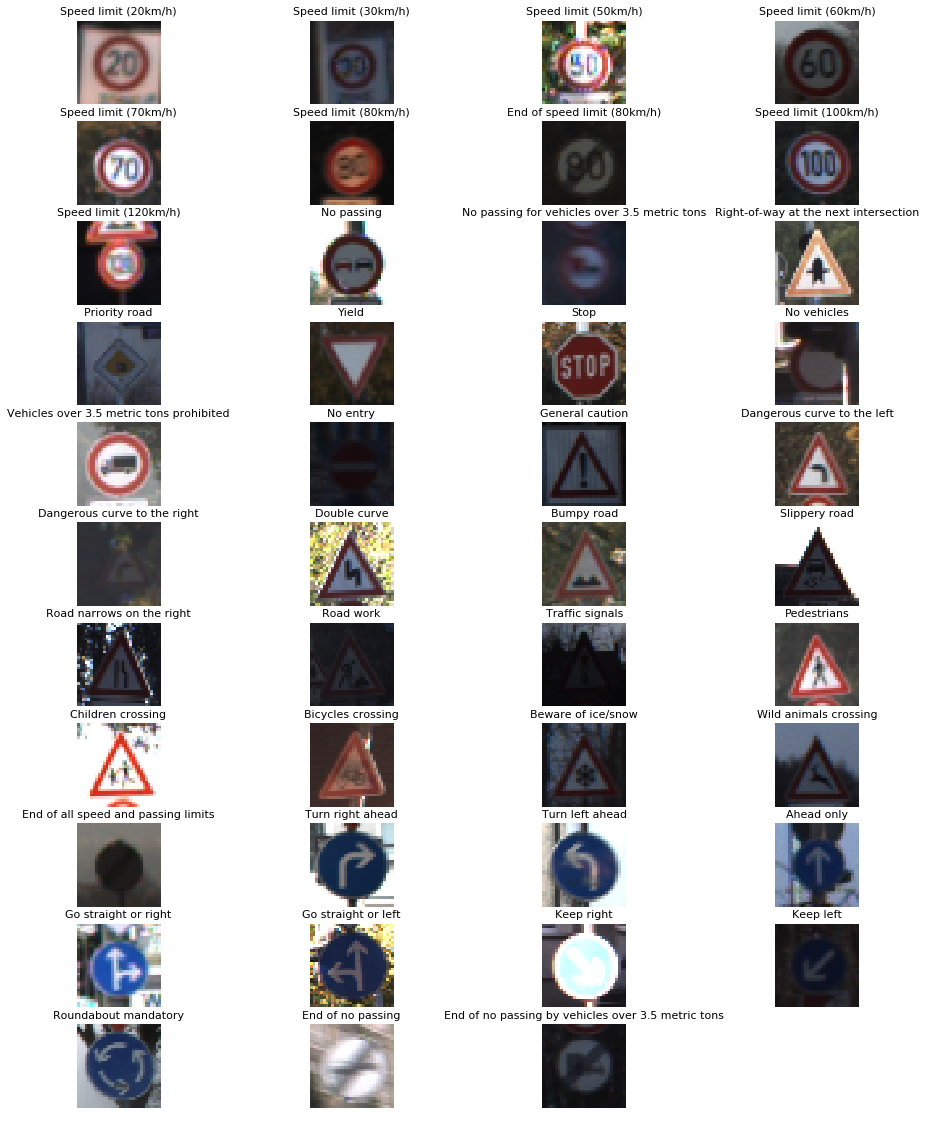

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# Load the signnames from the csv file to label the traffic signs
signnames = pd.read_csv('./signnames.csv')

# Returns the name to a traffic sign
def get_signname(label):
    return signnames[signnames['ClassId']==label].values[0][1]

# Displays a list of traffic signs and labels them
def display_signs(X_show, y_show):
    plt.figure(figsize=(16, 20))
    fontsize=11
    for i in range(len(X_show)):
        plt.subplot(11, 4, i+1)
        plt.axis('off')
        plt.title(get_signname(y_show[i]), fontsize=fontsize)
        plt.imshow(X_show[i])

# Create a new array to store the random traffic signs which will be displayed
X_show = np.ndarray(shape=(n_classes,32,32,3), dtype=np.uint8)
y_show = np.ndarray(shape=(n_classes), dtype=np.uint8)
# Take a random traffic sign (one of each type) and store it in the array
for i in range(n_classes):
    X_show[i] = X_train[random.choice(np.where(y_train==i)[0])]
    y_show[i]=i

# Display the random traffic signs
display_signs(X_show, y_show)

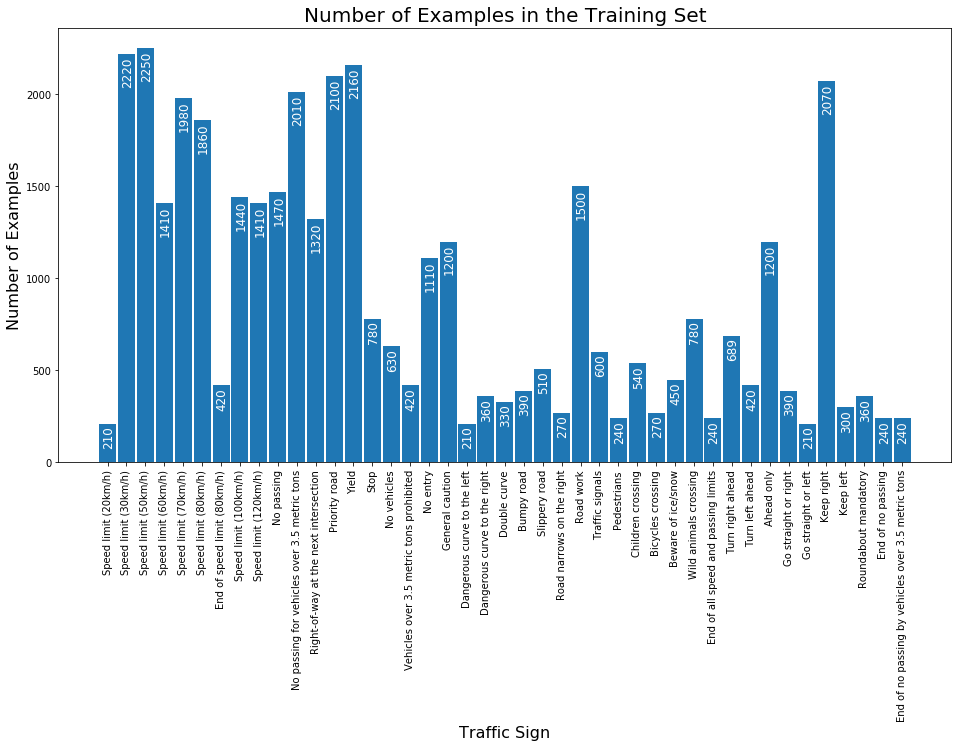

In [4]:
# Draw a plot
def displayPlot(labels, label_count, set_type='Training', rotation=90):
    
    # Get the maximum of the label counts
    maxlabel = max(label_count)
    
    # The index for the bars
    ind = np.arange(len(labels))
    # The width of the bars
    padding=0.05
    width = 0.9
    # Scale the plot
    fig, ax = plt.subplots(figsize=(16, 8))
    rects1 = ax.bar(ind + padding, label_count, width)
    # Set the labels
    ax.set_xlabel('Traffic Sign', fontsize=16)
    ax.set_ylabel('Number of Examples', fontsize=16)
    ax.set_xticks(ind + padding)
    # Get the name of the traffic signs
    label_names = []
    for i in range(len(labels)):
        label_names.append(get_signname(labels[i]))
    # Assign and rotate the labels
    ax.set_xticklabels(label_names, rotation=rotation)
    # Set the title
    ax.set_title('Number of Examples in the {} Set'.format(set_type), fontsize=20)
    
    # Display the number of examples on the bars
    for rect in rects1:
        # Get the height of the bar
        height = rect.get_height()
        # Get the string length of the bar label
        heightstr = "{:.0f}".format(height)
        # Calculate how much the label needs to be shifted
        labelshift = height-len(heightstr)*maxlabel*0.02
        # Add the label to the bar
        ax.text(rect.get_x()+rect.get_width()/2.+padding, labelshift, heightstr, color='w', rotation=90, fontsize=12, ha='center', va='bottom')

# Count the examples and store them in variables
unique_train, counts_train = np.unique(y_train, return_counts=True)
# Display the number of exaples
displayPlot(unique_train, counts_train, set_type='Training')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2

# Gray scales the images and normalizes the values between -1 and 1
def scale_to_gray_and_normalize(color_imgs):
    # Create a new numpy.ndarray for the gray images
    gray_imgs = np.ndarray(shape=(color_imgs.shape[0], color_imgs.shape[1], color_imgs.shape[2], 1))
    # Iterate through all the images
    for i in range(len(color_imgs)):
        # Convert the image to gray and normalize the value to a value between -1 and 1
        gray_imgs[i] = cv2.cvtColor(color_imgs[i], cv2.COLOR_BGR2GRAY).reshape(32, 32, 1) / 127.5 - 1
    # Return the gray images
    return gray_imgs

# Grayscale and normalize the training set
X_train = scale_to_gray_and_normalize(X_train)
# Grayscale and normalize the test set
X_test = scale_to_gray_and_normalize(X_test)

### Split Data into Training, Validation and Testing Sets

In [6]:
### Split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

# The testing set is already defined. It is just necessary to split the training data into a training set and validation set
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

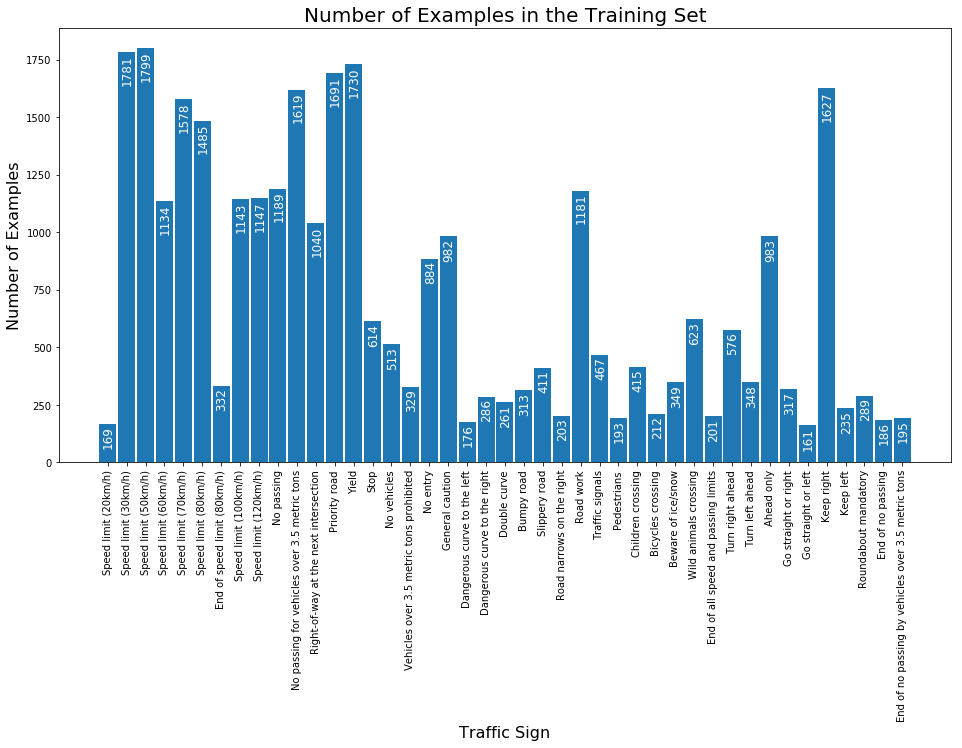

In [7]:
# Count the examples and store them in variables
unique_labels, counts_labels = np.unique(y_train, return_counts=True)
# Count the examples and display the number of exaples
displayPlot(unique_labels, counts_labels, set_type='Training')

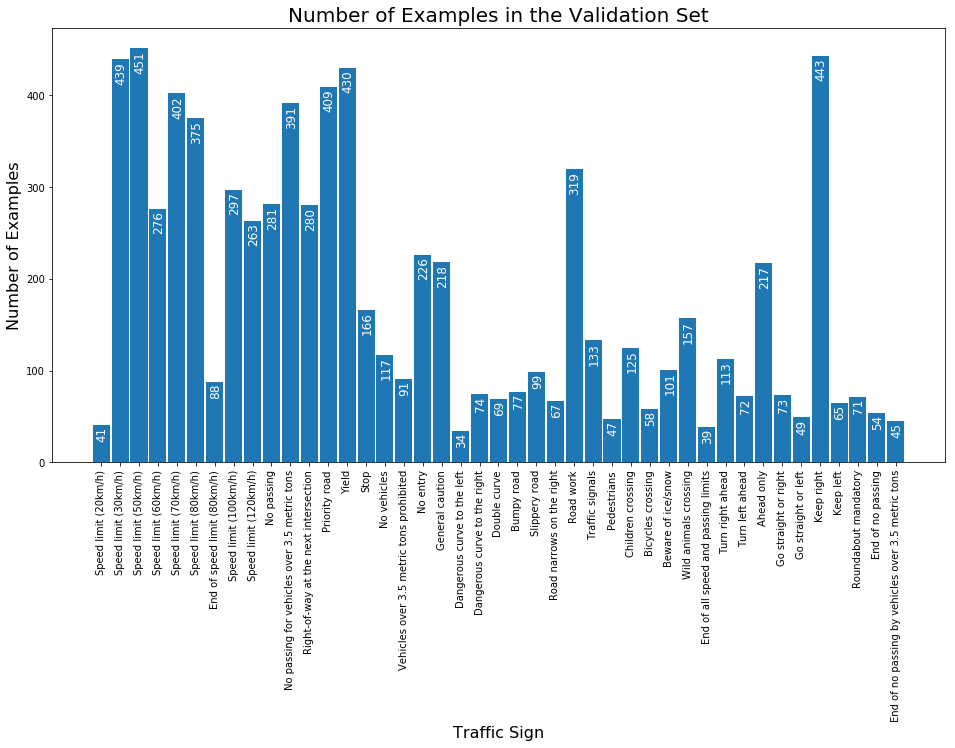

In [8]:
# Count the examples and store them in variables
unique_labels, counts_labels = np.unique(y_validation, return_counts=True)
# Count the examples and display the number of exaples
displayPlot(unique_labels, counts_labels, set_type='Validation')

### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

# Defines the architecture based on LeNet. Dropouts are added to each layer and the filters are deeper than LeNet.
def LeNet(x, dropout_keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Dropout 1
    dropout_output1 = tf.nn.dropout(conv1, dropout_keep_prob)

    # Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(dropout_output1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Dropout 2
    dropout_output2 = tf.nn.dropout(conv2, dropout_keep_prob)

    # Flatten. Input = 5x5x32. Output = 800.
    fc0   = flatten(dropout_output2)
    
    # Layer 3: Fully Connected. Input = 800. Output = 300.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 300), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(300))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout 3
    dropout_output3 = tf.nn.dropout(fc1, dropout_keep_prob)

    # Layer 4: Fully Connected. Input = 300. Output = 200.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(300, 200), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(200))
    fc2    = tf.matmul(dropout_output3, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout 4
    dropout_output4 = tf.nn.dropout(fc2, dropout_keep_prob)

    # Layer 5: Fully Connected. Input = 200. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(200, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(dropout_output4, fc3_W) + fc3_b
    
    return logits

In [10]:
# Create Placeholders for an arbitrary number of features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
# Running on Windows with Anaconda. That means tf.one_hot() has to run on the cpu. Otherwise python crashes.
with tf.device('/cpu:0'):
    one_hot_y = tf.one_hot(y, 43)

In [11]:
# Set the learning rate
rate = 0.001

# Create a placeholder for dropout
keep_prob = tf.placeholder(tf.float32)
# Run the LeNet based architecture with features and dropout
logits = LeNet(x, keep_prob)
# Calculate the cross entropy
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
# Calculate the loss
loss_operation = tf.reduce_mean(cross_entropy)
# Use Adam for optimization
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
# Minimize the loss
training_operation = optimizer.minimize(loss_operation)

In [12]:
# Calculate the accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# Save the model
saver = tf.train.Saver()

# Evaluates the validation and testing data and returns the accuracy
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [13]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

# Train the model on the training data and display the validation accuracy after each epoch
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.280
Validation Accuracy = 0.283

EPOCH 2 ...
Training Accuracy = 0.571
Validation Accuracy = 0.568

EPOCH 3 ...
Training Accuracy = 0.728
Validation Accuracy = 0.730

EPOCH 4 ...
Training Accuracy = 0.803
Validation Accuracy = 0.797

EPOCH 5 ...
Training Accuracy = 0.846
Validation Accuracy = 0.838

EPOCH 6 ...
Training Accuracy = 0.893
Validation Accuracy = 0.889

EPOCH 7 ...
Training Accuracy = 0.894
Validation Accuracy = 0.891

EPOCH 8 ...
Training Accuracy = 0.917
Validation Accuracy = 0.909

EPOCH 9 ...
Training Accuracy = 0.926
Validation Accuracy = 0.918

EPOCH 10 ...
Training Accuracy = 0.937
Validation Accuracy = 0.927

EPOCH 11 ...
Training Accuracy = 0.952
Validation Accuracy = 0.946

EPOCH 12 ...
Training Accuracy = 0.963
Validation Accuracy = 0.955

EPOCH 13 ...
Training Accuracy = 0.962
Validation Accuracy = 0.952

EPOCH 14 ...
Training Accuracy = 0.953
Validation Accuracy = 0.944

EPOCH 15 ...
Training Accuracy = 0.972
Valid

In [14]:
# Load the model and calculate the accuracy of the test data set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.956


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Create a new array for the new traffic signs
X_new = np.ndarray(shape=(16,32,32,3), dtype=np.uint8)
y_new = np.ndarray(shape=(16), dtype=np.uint8)

# Read the traffic signs and store them in the array
X_new[0] = cv2.cvtColor(cv2.imread('./additional_examples/img1_32.png'), cv2.COLOR_BGR2RGB)
y_new[0]=12

X_new[1] = cv2.cvtColor(cv2.imread('./additional_examples/img2_32.png'), cv2.COLOR_BGR2RGB)
y_new[1]=4

X_new[2] = cv2.cvtColor(cv2.imread('./additional_examples/img3_32.png'), cv2.COLOR_BGR2RGB)
y_new[2]=14

X_new[3] = cv2.cvtColor(cv2.imread('./additional_examples/img4_32.png'), cv2.COLOR_BGR2RGB)
y_new[3]=18

X_new[4] = cv2.cvtColor(cv2.imread('./additional_examples/img5_32.png'), cv2.COLOR_BGR2RGB)
y_new[4]=17

X_new[5] = cv2.cvtColor(cv2.imread('./additional_examples/img6_32.png'), cv2.COLOR_BGR2RGB)
y_new[5]=14

X_new[6] = cv2.cvtColor(cv2.imread('./additional_examples/img7_32.png'), cv2.COLOR_BGR2RGB)
y_new[6]=38

X_new[7] = cv2.cvtColor(cv2.imread('./additional_examples/img8_32.png'), cv2.COLOR_BGR2RGB)
y_new[7]=4

X_new[8] = cv2.cvtColor(cv2.imread('./additional_examples/img9_32.png'), cv2.COLOR_BGR2RGB)
y_new[8]=32

X_new[9] = cv2.cvtColor(cv2.imread('./additional_examples/img10_32.png'), cv2.COLOR_BGR2RGB)
y_new[9]=5

X_new[10] = cv2.cvtColor(cv2.imread('./additional_examples/img11_32.png'), cv2.COLOR_BGR2RGB)
y_new[10]=30

X_new[11] = cv2.cvtColor(cv2.imread('./additional_examples/img12_32.png'), cv2.COLOR_BGR2RGB)
y_new[11]=15

X_new[12] = cv2.cvtColor(cv2.imread('./additional_examples/img13_32.png'), cv2.COLOR_BGR2RGB)
y_new[12]=23

X_new[13] = cv2.cvtColor(cv2.imread('./additional_examples/img14_32.png'), cv2.COLOR_BGR2RGB)
y_new[13]=40

X_new[14] = cv2.cvtColor(cv2.imread('./additional_examples/img15_32.png'), cv2.COLOR_BGR2RGB)
y_new[14]=17

X_new[15] = cv2.cvtColor(cv2.imread('./additional_examples/img16_32.png'), cv2.COLOR_BGR2RGB)
y_new[15]=13

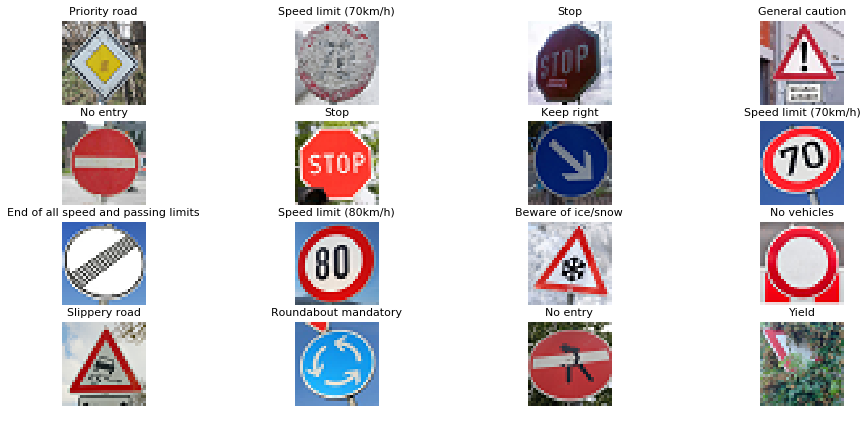

In [16]:
# Display the traffic sign images and label them
display_signs(X_new, y_new)

In [17]:
# Grayscale and normalize the images
X_new_gray = scale_to_gray_and_normalize(X_new)

### Predict the Sign Type for Each Image

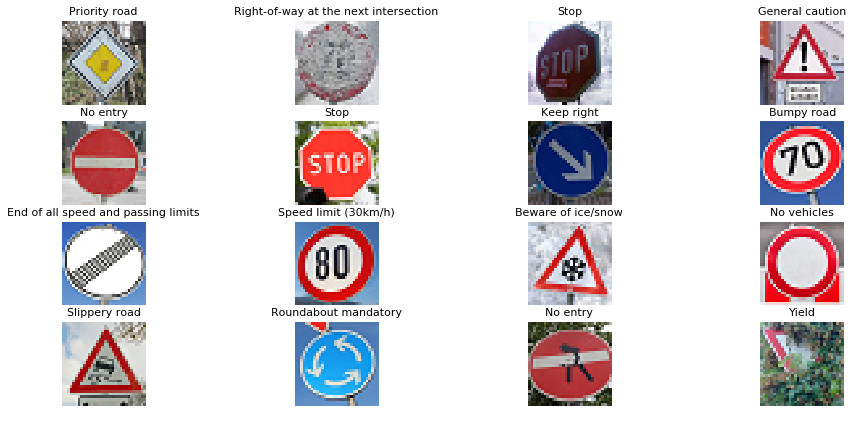

In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Create a list for the prdictions
preds = []

prediction = tf.nn.softmax(logits)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    # Run the model and make prediction for each new traffic sign
    prediction = sess.run(prediction, feed_dict={x: X_new_gray, keep_prob: 1.0})
    # Get the prediction of each new traffic sign
    for i in prediction:
        preds.append(np.argmax(i))

# Display the traffic signs and label them with their prediction
display_signs(X_new, preds)


### Analyze Performance

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

# Run the evaluation for the new traffic signs and display the accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_new_gray, y_new)
    print("Accuracy on new images = {:.3f}".format(test_accuracy))

Accuracy on new images = 0.812


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [20]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

# Calculate the top five probabilities for each traffic sign
top5 = tf.nn.top_k(prediction, k=5)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top5_prediction = sess.run(top5, feed_dict={x: X_new_gray, keep_prob: 1.0})

# Display the top five probabilities for each traffic sign
for i in range(len(X_new_gray)):
    val = top5_prediction[0][i]
    ind = top5_prediction[1][i]
    print('Original traffic sign was: {} ({})'.format(y_new[i], get_signname(y_new[i])))
    for j in range(len(val)):
        print("Predicted with a probability of {:.3%} to be {} ({})".format(val[j], ind[j], get_signname(ind[j])))
    print()

Original traffic sign was: 12 (Priority road)
Predicted with a probability of 100.000% to be 12 (Priority road)
Predicted with a probability of 0.000% to be 40 (Roundabout mandatory)
Predicted with a probability of 0.000% to be 35 (Ahead only)
Predicted with a probability of 0.000% to be 7 (Speed limit (100km/h))
Predicted with a probability of 0.000% to be 13 (Yield)

Original traffic sign was: 4 (Speed limit (70km/h))
Predicted with a probability of 24.321% to be 11 (Right-of-way at the next intersection)
Predicted with a probability of 23.936% to be 33 (Turn right ahead)
Predicted with a probability of 10.588% to be 40 (Roundabout mandatory)
Predicted with a probability of 7.994% to be 35 (Ahead only)
Predicted with a probability of 7.181% to be 12 (Priority road)

Original traffic sign was: 14 (Stop)
Predicted with a probability of 84.130% to be 14 (Stop)
Predicted with a probability of 4.274% to be 3 (Speed limit (60km/h))
Predicted with a probability of 2.866% to be 33 (Turn righ

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 